# Домашнее задание к лекции "Визуализация данных"

## Обязательная часть

Вам необходимо провести базовый [EDA](https://en.wikipedia.org/wiki/Exploratory_data_analysis) выбранного набора данных. 

Требования к анализу:
- построить не менее 4 визуализаций различных видов;
- каждая визуализация должным образом оформлена и читается даже в отрыве от контекста; 
- по каждой визуализации необходимо написать вывод (какую гипотезу на ее основе можно выдвинуть?).

**Откуда брать данные?**

Можете взять свои рабочие данные, либо найти открытые данные (например, на [kaggle.com](https://www.kaggle.com/)) по интересующей вас предметной области (тогда не забудьте их выложить на github вместе с ноутбуком). Если идей нет, можете взять один из перечисленных ниже:
- [данные приложений из Google Play](https://www.kaggle.com/lava18/google-play-store-apps);
- [данные о видео из трендов YouTube](https://www.kaggle.com/datasnaek/youtube-new);
- [данные об уровне счастья в разных странах](https://www.kaggle.com/unsdsn/world-happiness);
- [данные по фильмам и сериалам Netflix](https://www.kaggle.com/shivamb/netflix-shows).

### Дополнительная часть (необязательная)

* построить дополнительно не менее 2 визуализаций (итого не менее 6);
* в работе должны присутствовать следующие визуализации: boxplot, heatmap, scatter plot matrix;


In [1]:
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
import seaborn as sns

In [3]:
#увеличим дефолтный размер графиков
from pylab import rcParams
rcParams['figure.figsize'] = 14,8

In [4]:
df = pd.read_csv('world_happines_2019.csv')

In [5]:
df.head()

,Overall rank,Country or region,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
0,1,Finland,7.769,1.340,1.587,0.986,0.596,0.153,0.393
1,2,Denmark,7.600,1.383,1.573,0.996,0.592,0.252,0.410
2,3,Norway,7.554,1.488,1.582,1.028,0.603,0.271,0.341
3,4,Iceland,7.494,1.380,1.624,1.026,0.591,0.354,0.118
4,5,Netherlands,7.488,1.396,1.522,0.999,0.557,0.322,0.298


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 156 entries, 0 to 155
Data columns (total 9 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Overall rank                  156 non-null    int64  
 1   Country or region             156 non-null    object 
 2   Score                         156 non-null    float64
 3   GDP per capita                156 non-null    float64
 4   Social support                156 non-null    float64
 5   Healthy life expectancy       156 non-null    float64
 6   Freedom to make life choices  156 non-null    float64
 7   Generosity                    156 non-null    float64
 8   Perceptions of corruption     156 non-null    float64
dtypes: float64(7), int64(1), object(1)
memory usage: 11.1+ KB


In [58]:
df.describe()

,Overall rank,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
count,156.000000,156.000000,156.000000,156.000000,156.000000,156.000000,156.000000,156.000000
mean,78.500000,5.407096,0.905147,1.208814,0.725244,0.392571,0.184846,0.110603
std,45.177428,1.113120,0.398389,0.299191,0.242124,0.143289,0.095254,0.094538
min,1.000000,2.853000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,39.750000,4.544500,0.602750,1.055750,0.547750,0.308000,0.108750,0.047000
50%,78.500000,5.379500,0.960000,1.271500,0.789000,0.417000,0.177500,0.085500
75%,117.250000,6.184500,1.232500,1.452500,0.881750,0.507250,0.248250,0.141250
max,156.000000,7.769000,1.684000,1.624000,1.141000,0.631000,0.566000,0.453000


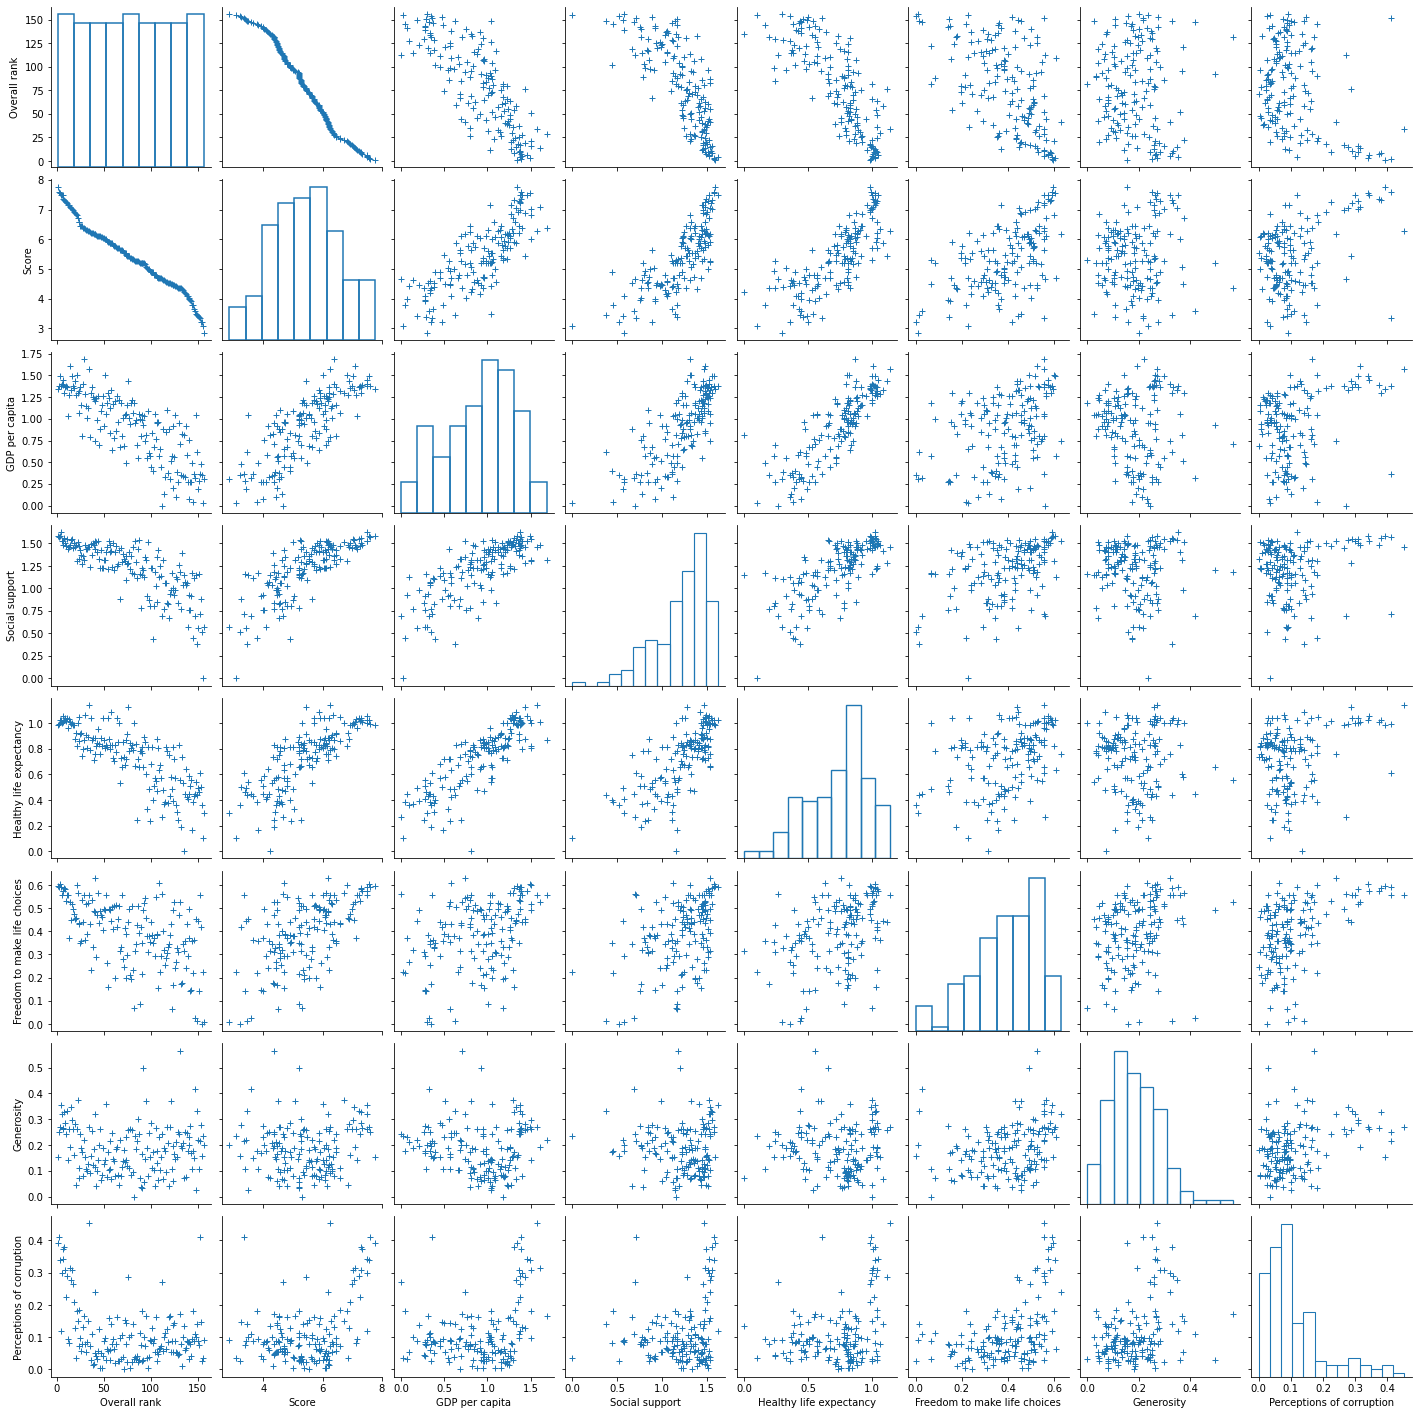

In [7]:
sns.pairplot(df, plot_kws={'marker':'+', 'linewidth':1}, diag_kws=dict(fill=False))

### Комментарии к Scatter Plot Matrix: наблюдения и гипотезы
Есть обратная взаимосвязь между Score и Rank - потому что страны проранжированы по убыванию Score. 

Из описания датасета:
"The columns following the happiness score estimate the extent to which each of six factors – economic production, social support, life expectancy, freedom, absence of corruption, and generosity – contribute to making life evaluations higher in each country than they are in Dystopia, a hypothetical country that has values equal to the world’s lowest national averages for each of the six factors. They have no impact on the total score reported for each country, but they do explain why some countries rank higher than others."

###### Взаимосвязь Score и остальных показателей:
Прямая взаимосвязь между Score и GDP per capita, Social Support и Healthy life expectancy выражена больше чем от Freedom to make life choices (но и здесь можно предположить наличие прямой взаимосвязи). При этом для этих показателей характерна более выскоая плотность данных в области с высоким Score и высоким вторым показателем - можно предположить что для стран с низким Score эта взаимосвязь слабее, что для стран с высоким Score. 

Наличие взаимосвязи между Score и Generosity, а также Perceptions of corruption неочевидна - возможно, взаимосвязь не линейная: так, высокие показатели Generosity есть как среди стран с достаточно низким  рейтингом, так и со средним и высоким, однако низкие показатели Generosity чаще наблюдаются в странах с со Score 4-7, нежели со Score <4. 

Низкий показатель Perceptions of corruption (PoC) означает высокий уровень коррупции в стране,а выский показатель - низкий уровень коррупции (согласно опросам): https://en.wikipedia.org/wiki/Corruption_Perceptions_Index 
Большинство стран с рейтингом 0-0.7 демонстрирует низкий уровень восприятия (0.0-0.2) - повышенный уровень коррупциию. Интересно, что плотность данных повышен в районе PoC <0.1 и Score 5-7, т.е.  странах с достаточно высоким рейтингом наблюдается высокий уровень коррупции.  При этом наибольшее количество стран с высоким PoC, т.е. низким уровнем коррупции, среди стран с высоким рейтингом (приблизително 7-8) - что было ожидаемо. Т.о. взаимосвязь скорее обратная, возможно нелинейная.  

###### Взаимосвязь показателей (кроме Score) между собой: 
Наличие выраженной прямой взаимосвязи можно предположить для следующих пар показателей: 
- GDP per capita & Social Support 
- GDP per capita & Healthy life expectancy
- Social Support & Healthy life expectancy

Менее выраженной прямой взаимосвязи:
- Freedom to make life choices & GDP per capita
- Freedom to make life choices & Social Support
- Freedom to make life choices & Healthy life expectancy

Взаимосвязь между показателями Generosity & GDP per capita и Perceptions of corruption &  GDP per capita схожа со взаимосвяью этих показателей со Score - невыраженная и, возможно, не линейная (см описание выше).  

Для Perceptions of corruption & Social Support сложно судить о наличии взаимосвязи, если она есть, то это нелинейная взаимосвязь: для большинства стран наблюдается показатель 1<= Social Support < 1.5 при низком PoC (высокий уровень коррупции), при этом для стран с наиболее высоким уровнем Social Support (около 1.5) наблюдаются все возможные уровни PoC - рендж от 0 до 0.4. Похожая картина для Perceptions of corruption & Healthy life expectancy и Perceptions of corruption & Freedom to make life choices, но для них сильнее выражена возможность положительной связи - есть низкие показатели при низком PoC (высокой коррупции).

Для Generosity сложно судить о наличии взаимосвязи с Social support,	Healthy life expectancy, Freedom to make life choices и Perceptions of corruption. 

In [8]:
#увеличим размер графиков
from pylab import rcParams
rcParams['figure.figsize'] = 16,16

<AxesSubplot:ylabel='Country or region'>

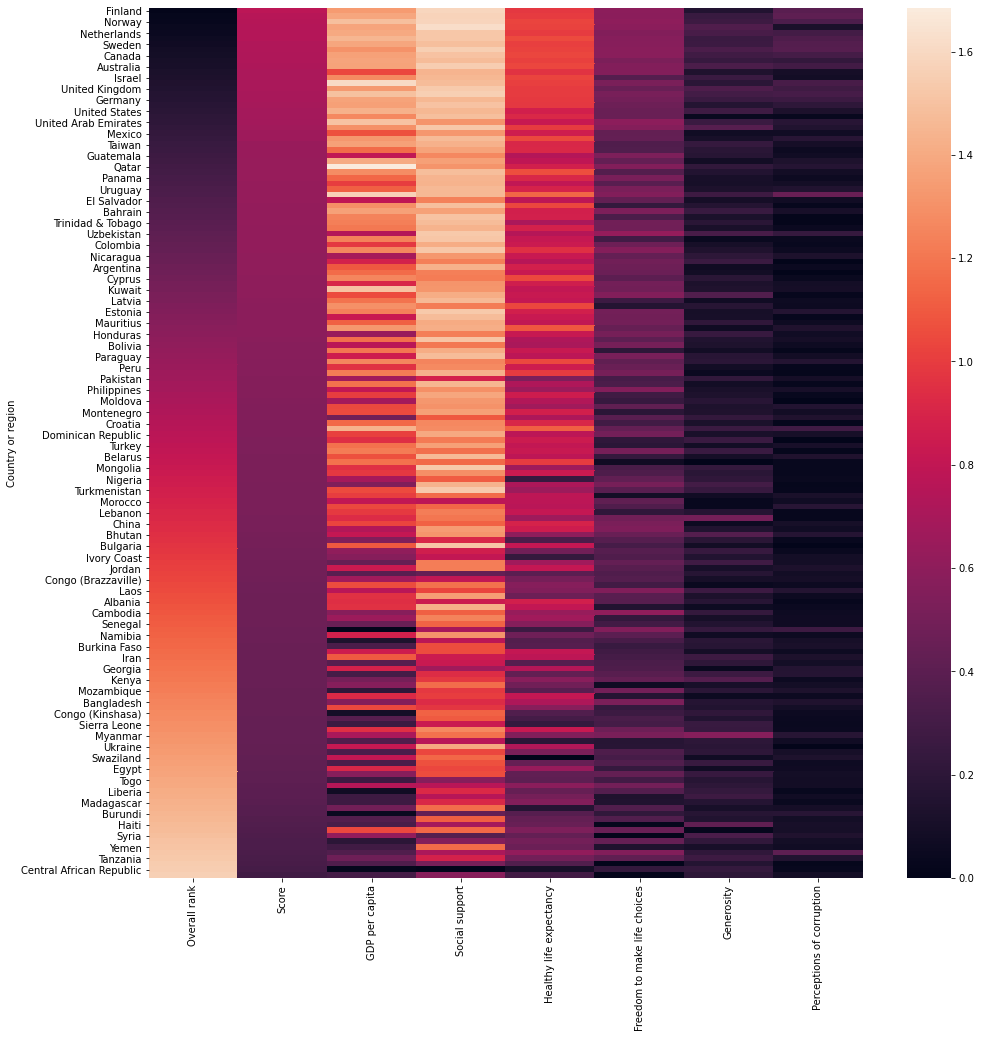

In [9]:
# приводим Overall ran и Score к шакалам, сопоставимым с остальными показателями
df_heatmap = pd.DataFrame(df.set_index('Country or region'))
df_heatmap['Overall rank']= df_heatmap['Overall rank'].apply([lambda x: x/100])
df_heatmap['Score']= df_heatmap['Score'].apply([lambda x: x/10])
#df_heatmap
sns.heatmap(df_heatmap)

#### Комментарий к heatmap
Разные показатели используют разные шкалы, поэтому столбцы Social Support, GDP per capita and Healthy life Expectancy окрашены ярче, чем Freedom, Generosity и Perception of corruption. 


Social Stability и Healthy life Expectancy демонстрируют более высокие показатели в странах с более высоким Score; тот же эффект наблюдается для GDP, но он выражен меньше - среди стран с высоким Score встречаются и низкие показатели GDP - это может указывать на то, что уровень счастья в большей степени зависит от Social Stability и Healthy life Expectancy, чем от GDP. Также в странах с наиболее высоким Score наблюдается наиболее низкий уровень коррупции (высокий PoC) - при этом для стран, которые не входят в топ 20  по уровню счастья эта взаимосвязь не выражена. 
В еще меньшей степени выражено наличие положительной взаимосвязи между Freedom и Score, а также Generosity и Score. 


<AxesSubplot:title={'center':"Сountries' happines factors"}>

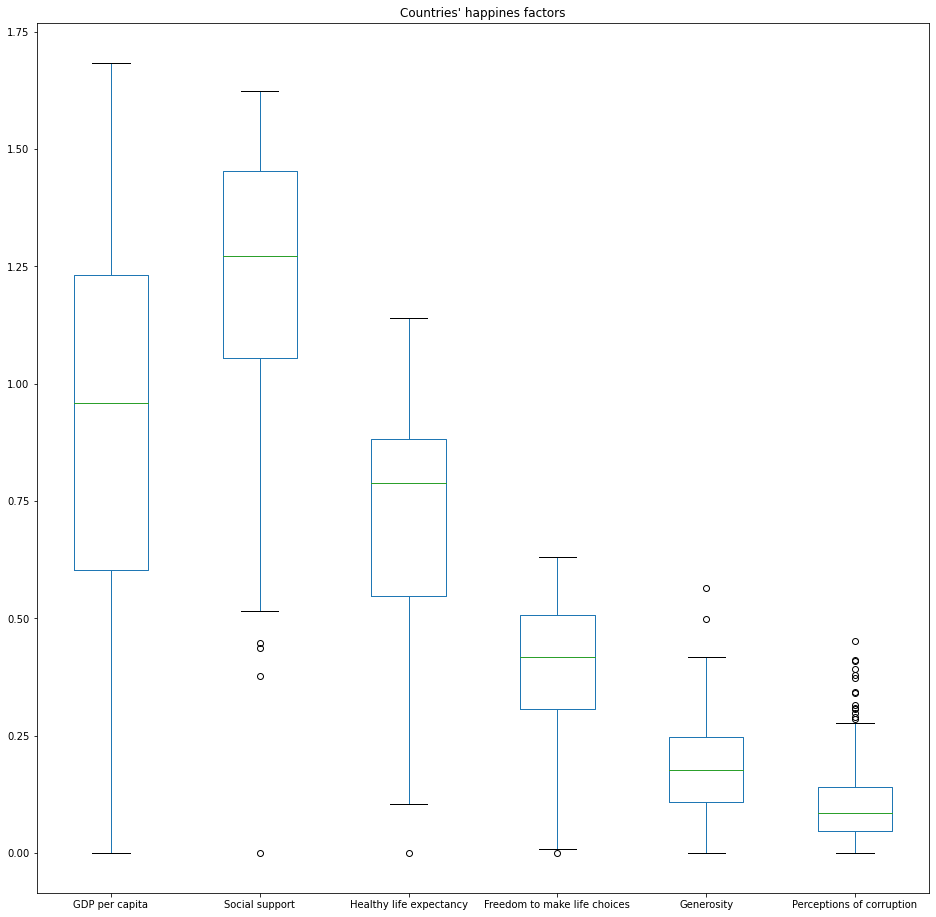

In [10]:
df[['GDP per capita',
    'Social support',
    'Healthy life expectancy',
    'Freedom to make life choices',
    'Generosity',
    'Perceptions of corruption']].plot(kind='box', title="Сountries' happines factors")

### Комментарий к box plot
Судя по min, max и median значениям (см. выше), шкалы сопоставимы между собой для первых 3 показателей и для 3 показателей. При этом из первой группы самая высокая медиана у Social Support - низкие значения показателя (4шт) считаются выбросами. Для Healthy life expectancy медиана значительно ниже, но прибилжена к максимуму, из чего следует, что низкие показатели более редкие - один из них даже считается выбросом. Однако для GDP per capita медиана близка к среднему, нет выбросов и в целом бокплот более симметричный. Этот показатель ближе остальных к нормальному распределению (это можно наблюдать и на гистограмме выше). 
Во второй тройке показателей самая большая медиана и боксплот, смещенный с сторону максимума, и один нижний выброс  у Freedom to make life choices  - для этот показатель достаточно высокий для большинства страню Для Generosity и Perception of corruption (в особенности), напротив, боксплот смещен вниз и многие высокие значения могут считаться выбросами - для большинства стран характерны низкие показатели - в особеннотси PoC (выскоий уровень коррупции), т.е. низкий уровень коррупции - это редкое исключение. 

<AxesSubplot:title={'center':'Correlation between GDP and Social support'}, xlabel='GDP per capita', ylabel='Social support'>

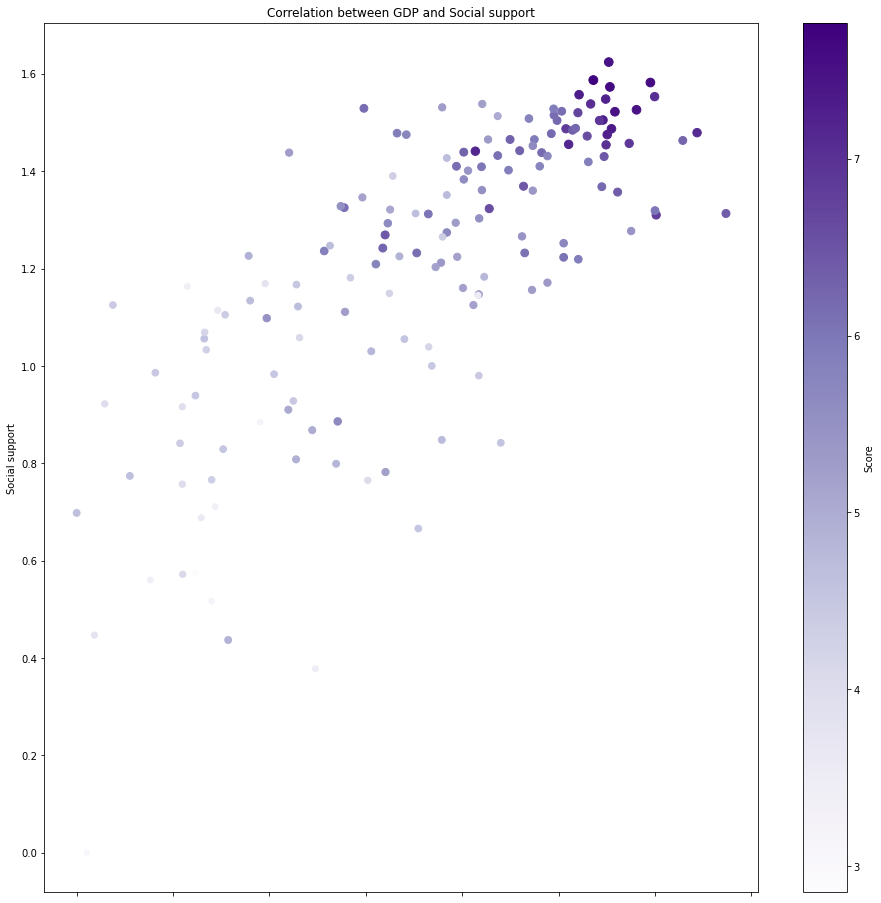

In [16]:
df.plot(kind='scatter', 
        x='GDP per capita', 
        y='Social support', 
        s=df['Score']*10,
        c='Score',
        colormap='Purples',
        title='Correlation between GDP and Social support',
       )

### Комментарий
Высокий уровень соц поддержки в сочетании с высоким ВВП характерен для стран, в которых также отмечен высокий уровень счастья. 

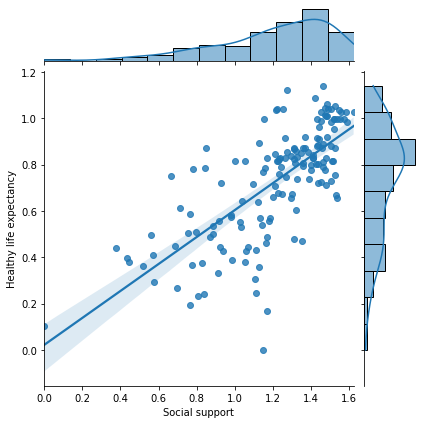

In [12]:
sns.jointplot(x=df['Social support'], y=df['Healthy life expectancy'], data=df['Score'], kind='reg')

### Комментрий
Между Healthy life expectancy и Social suuport наблюдается прямая взаимосвязь.

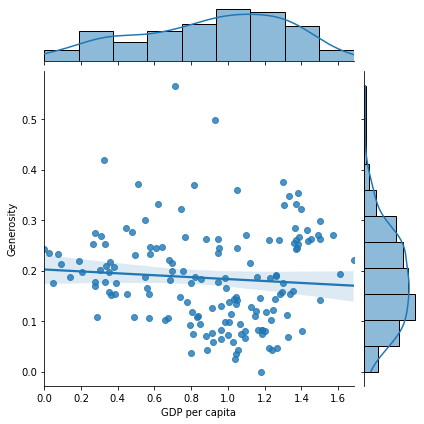

In [13]:
sns.jointplot(x=df['GDP per capita'], y=df['Generosity'], data=df['Score'], kind='reg')

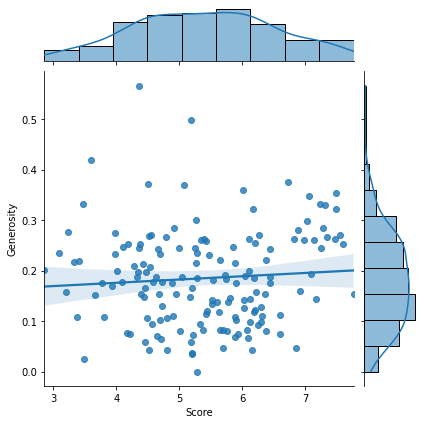

In [14]:
sns.jointplot(x=df['Score'], y=df['Generosity'], data=df['Score'], kind='reg')

### Комментрий
Взаимосвязь между Generosity и Score, а также между Generosity и GDP per capita установить не удалось.